In [1]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import talib 
from dateutil.relativedelta import relativedelta
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

from Tool_v1 import *


# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
yf.pdr_override()

In [2]:
stock_name=["AAPL","GOOG","AMZN","TSLA","BABA","PTPI","BTCY",'FOX',"NVDA","DIS","NKE","XOM","KO",
            "2319.HK","0700.HK","1211.HK","6133.hk",'2318.HK','1448.HK','1810.HK',"3690.HK","2018.HK"]
start="2020-12-31"
end="2023-09-30"
score=[]
for i in stock_name:
    #MACD619RSI21_8020
    stock_data=pct_change(i,start,end)
    stock_data=stock_data.copy()
    #指标运算
    stock_data=MACD_short(stock_data)
    stock_data=RSI(stock_data)
    stock_data=RSI_MACD(stock_data,21,80,20)
    stock_data= my_rsi(stock_data, 21)
    stock_data = stock_data.dropna()
    
#    lr = LogisticRegression()
    # 设置正则化类型（L1, L2, Elastic Net）
    penalty = 'l2' 

    # 设置正则化强度（C）
    C = 0.005
    #logistic regression
    lr = LogisticRegression(penalty =penalty, C=C) 
    
    #X = stock_data.loc[:,["re_close", "re_open", "my_rsi", "Position", "RSI21"]].values
    X = stock_data.loc[:,["Open","High","Close_price_percentage","log_return","re_close", "re_open", "MACD","Position"]].values
    #X = stock_data.loc[:,["Open","High","Low","Close"]].values
    

    st_x= StandardScaler()  
    X= st_x.fit_transform(X)  

    #Y = stock_data.loc[:,["up_or_down"]].values.ravel()
    Y = np.where(stock_data['Open'].shift(-1) > stock_data['Open'],1,-1)
    #Y = np.where(stock_data['Close'].shift(-1) > stock_data['Close'],1,-1)

    #X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)

    split = int(0.7*len(stock_data))
    X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]
    
    lr.fit(X_train, Y_train)
    y_pred = lr.predict(X_test)
    f1_score(y_pred, Y_test)
    
    importance = lr.coef_[0]
    score.append(lr.score(X_test,Y_test))
    
    
    print(i,": ","model_score: ",lr.score(X_test,Y_test)," f1_score: ",f1_score(y_pred, Y_test)," accuary_score: ",accuracy_score(Y_test,y_pred))
    print()

AAPL :  model_score:  0.8706467661691543  f1_score:  0.8839285714285715  accuary_score:  0.8706467661691543

GOOG :  model_score:  0.8109452736318408  f1_score:  0.8303571428571429  accuary_score:  0.8109452736318408

AMZN :  model_score:  0.8706467661691543  f1_score:  0.8761904761904761  accuary_score:  0.8706467661691543

TSLA :  model_score:  0.8557213930348259  f1_score:  0.8625592417061612  accuary_score:  0.8557213930348259

BABA :  model_score:  0.746268656716418  f1_score:  0.7052023121387283  accuary_score:  0.746268656716418

PTPI :  model_score:  0.7860696517412935  f1_score:  0.6950354609929078  accuary_score:  0.7860696517412935

BTCY :  model_score:  0.736318407960199  f1_score:  0.6863905325443787  accuary_score:  0.736318407960199

FOX :  model_score:  0.8059701492537313  f1_score:  0.8115942028985508  accuary_score:  0.8059701492537313

NVDA :  model_score:  0.8208955223880597  f1_score:  0.8348623853211008  accuary_score:  0.8208955223880597

DIS :  model_score:  0.8

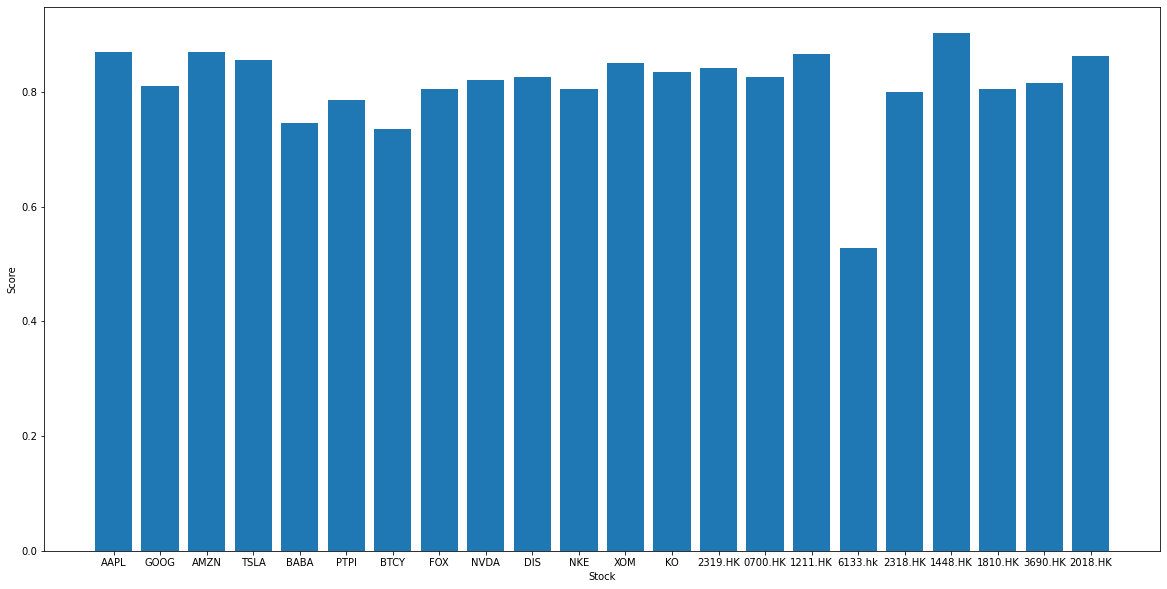

In [3]:
plt.figure(figsize=(20, 10))
plt.bar(stock_name, score)


plt.xlabel('Stock')
plt.ylabel('Score')

plt.savefig('Score.png')
# 显示图形
plt.show()

In [4]:
stock_name=["AAPL","GOOG","AMZN","TSLA","BABA","PTPI","BTCY",'FOX',"NVDA","DIS","NKE","XOM","KO",
            "2319.HK","0700.HK","1211.HK","6133.hk",'2318.HK','1448.HK','1810.HK',"3690.HK","2018.HK"]
start="2020-12-31"
end="2023-09-30"

for i in stock_name:
    #MACD619RSI21_8020
    stock_data=pct_change(i,start,end)
    stock_data=stock_data.copy()
    #指标运算
    stock_data=MACD_short(stock_data)
    stock_data=RSI(stock_data)
    stock_data=RSI_MACD(stock_data,21,80,20)
    stock_data= my_rsi(stock_data, 21)
    stock_data = stock_data.dropna()
    
    #lr = LogisticRegression()
    # 设置正则化类型（L1, L2, Elastic Net）
    penalty = 'l2' 

    # 设置正则化强度（C）
    C = 0.005
    #logistic regression
    lr = LogisticRegression(penalty =penalty, C=C) 
    
    X = stock_data.loc[:,["Open","High","Close_price_percentage","log_return","re_close", "re_open", "MACD","Position"]].values
    
    #X = stock_data.loc[:,["re_close", "re_open", "my_rsi", "Position", "RSI21"]].values
    #X = stock_data.loc[:,["re_close","re_open"]].values
    

    st_x= StandardScaler()  
    X= st_x.fit_transform(X)  

    #Y = stock_data.loc[:,["up_or_down"]].values.ravel()
    
    Y = np.where(stock_data['Open'].shift(-1) > stock_data['Open'],1,-1)
    #Y = np.where(stock_data['Close'].shift(-1) > stock_data['Close'],1,-1)

    #X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)

    split = int(0.7*len(stock_data))
    X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]
    
    lr.fit(X_train, Y_train)
    y_pred = lr.predict(X_test)
    f1_score(y_pred, Y_test)
    
    
    print(i,": ","model_score: ",lr.score(X_test,Y_test)," f1_score: ",f1_score(y_pred, Y_test)," accuary_score: ",accuracy_score(Y_test,y_pred))
    print()

AAPL :  model_score:  0.8706467661691543  f1_score:  0.8839285714285715  accuary_score:  0.8706467661691543

GOOG :  model_score:  0.8109452736318408  f1_score:  0.8303571428571429  accuary_score:  0.8109452736318408

AMZN :  model_score:  0.8706467661691543  f1_score:  0.8761904761904761  accuary_score:  0.8706467661691543

TSLA :  model_score:  0.8557213930348259  f1_score:  0.8625592417061612  accuary_score:  0.8557213930348259

BABA :  model_score:  0.746268656716418  f1_score:  0.7052023121387283  accuary_score:  0.746268656716418

PTPI :  model_score:  0.7860696517412935  f1_score:  0.6950354609929078  accuary_score:  0.7860696517412935

BTCY :  model_score:  0.736318407960199  f1_score:  0.6863905325443787  accuary_score:  0.736318407960199

FOX :  model_score:  0.8059701492537313  f1_score:  0.8115942028985508  accuary_score:  0.8059701492537313

NVDA :  model_score:  0.8208955223880597  f1_score:  0.8348623853211008  accuary_score:  0.8208955223880597

DIS :  model_score:  0.8